In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [75]:
#Reading the Indeed job listings file 
df = pd.read_csv('../Resources/mw_job_listings_scraped.csv')

In [76]:
df

,Job Title,Company Name,Location,Salary,Description,link,Category,Skills,Tools
0,Senior Business Analyst - Land,Berks Homes,"Mohnton, PA 19540",NaN,Senior Business Analyst - Land Berks Homes is ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Data Analyst,,"R, Scala"
1,ISS-P Data Center Analyst,Consolidated Nuclear Security,"Amarillo, TX",NaN,"Location: Amarillo, TX\nJob Title: ISS-P Data ...",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Data Analyst,,R
2,Junior Data Analyst,Strategic Marketing Services,"Louisville, KY 40223","$32,000 - $39,500 a year",Basic Function: Develop and process targeted m...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Data Analyst,Data Analysis,"SQL, R, Excel"
3,Data Analyst (Louisiana),Tetra Tech Inc.,"Laplace, LA",NaN,Tetra Tech is a leading provider of consulting...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Data Analyst,Data Analysis,"R, Excel"
4,Marketing Data Analyst,Mercedes Scientific,"Sarasota, FL 34211","$85,000 a year",Mercedes Scientific is a national leader in th...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Data Analyst,,R
...,...,...,...,...,...,...,...,...,...
15708,BI Developer (Power BI),USI Holdings Corporation,Remote,NaN,NaN,https://www.indeed.com/rc/clk?jk=5f84ee36c0d11...,Business Intelligence Developer,,
15709,Senior Business Intelligence Developer,BlueVine,"Redwood City, CA 94063 (Downtown area)",NaN,NaN,https://www.indeed.com/rc/clk?jk=45fd10af4b144...,Business Intelligence Developer,,
15710,SENIOR BUSINESS INTELLIGENCE DEVELOPER,XSOLIS,Remote,NaN,NaN,https://www.indeed.com/rc/clk?jk=43c084fafe1f1...,Business Intelligence Developer,,
15711,Sr. Business Intelligence Developer,Ensemble Health Partners,"Cincinnati, OH",NaN,NaN,https://www.indeed.com/rc/clk?jk=57ef8b0e02a25...,Business Intelligence Developer,,


In [77]:
#Cleaning steps for salary column
df = df.drop('link', axis=1)
df['Salary'] = df['Salary'].str.replace('a','')
df['Salary'] = df['Salary'].str.replace('yer','')
df['Salary'] = df['Salary'].str.replace('n','')
df['Salary'] = df['Salary'].str.replace(' , ','')
df['Salary'] = df['Salary'].str.replace('From','')
df['Salary'] = df['Salary'].str.replace('moth','')
df['Salary'] = df['Salary'].str.replace("'", "")
df['Salary'] = df['Salary'].str.replace('Up to','')
df['Salary'] = df['Salary'].str.replace('  ','')
df['Salary'] = df['Salary'].str.replace("''",'')
df['Salary'] = df['Salary'].str.replace("$",'')
df['Salary'] = df['Salary'].str.replace('hour','')
df['Salary'] = df['Salary'].str.strip()
df['Salary'] = df['Salary'].str.replace('week','')
df['Salary'] = df['Salary'].str.replace('dy','')
df['Salary'] = df['Salary'].str.rstrip() 
df['Salary'] = df['Salary'].str.strip()
df_salary= df.join(df['Salary'].str.split('-', 1, expand=True).rename(columns={0:'Min-Salary-Range', 1:'Max-Salary-Range'}))
df_salary["Min-Salary-Range"] =df_salary["Min-Salary-Range"].str.strip()
df_salary["Max-Salary-Range"]=df_salary["Max-Salary-Range"].str.strip()
df_salary['Min-Salary-Range'] = df_salary['Min-Salary-Range'].str.replace(',','')
df_salary['Max-Salary-Range'] = df_salary['Max-Salary-Range'].str.replace(',','')
df_salary["Min-Salary-Range"] =df_salary["Min-Salary-Range"].str.strip()
df_salary["Max-Salary-Range"] =df_salary["Max-Salary-Range"].str.strip()
df_salary["Min-Salary-Range"] = df_salary["Min-Salary-Range"].replace(np.nan, 0)
df_salary["Max-Salary-Range"] = df_salary["Max-Salary-Range"].replace(np.nan, 0)
df_salary["Min-Salary-Range"] =df_salary["Min-Salary-Range"].astype(float)
df_salary["Max-Salary-Range"] =df_salary["Max-Salary-Range"].astype(float)
df_salary['Min-Salary-Range'] = df_salary['Min-Salary-Range'].apply(lambda x: x*2000 if x<100 else x)
df_salary['Max-Salary-Range'] = df_salary['Max-Salary-Range'].apply(lambda x: x*2000 if x<100 else x)
df_salary['Mean_Salary'] = (df_salary['Min-Salary-Range'] + df_salary['Max-Salary-Range'])/2
df_salary

,Job Title,Company Name,Location,Salary,Description,Category,Skills,Tools,Min-Salary-Range,Max-Salary-Range,Mean_Salary
0,Senior Business Analyst - Land,Berks Homes,"Mohnton, PA 19540",NaN,Senior Business Analyst - Land Berks Homes is ...,Data Analyst,,"R, Scala",0.0,0.0,0.0
1,ISS-P Data Center Analyst,Consolidated Nuclear Security,"Amarillo, TX",NaN,"Location: Amarillo, TX\nJob Title: ISS-P Data ...",Data Analyst,,R,0.0,0.0,0.0
2,Junior Data Analyst,Strategic Marketing Services,"Louisville, KY 40223","32,000 - 39,500",Basic Function: Develop and process targeted m...,Data Analyst,Data Analysis,"SQL, R, Excel",32000.0,39500.0,35750.0
3,Data Analyst (Louisiana),Tetra Tech Inc.,"Laplace, LA",NaN,Tetra Tech is a leading provider of consulting...,Data Analyst,Data Analysis,"R, Excel",0.0,0.0,0.0
4,Marketing Data Analyst,Mercedes Scientific,"Sarasota, FL 34211","85,000",Mercedes Scientific is a national leader in th...,Data Analyst,,R,85000.0,0.0,42500.0
...,...,...,...,...,...,...,...,...,...,...,...
15708,BI Developer (Power BI),USI Holdings Corporation,Remote,NaN,NaN,Business Intelligence Developer,,,0.0,0.0,0.0
15709,Senior Business Intelligence Developer,BlueVine,"Redwood City, CA 94063 (Downtown area)",NaN,NaN,Business Intelligence Developer,,,0.0,0.0,0.0
15710,SENIOR BUSINESS INTELLIGENCE DEVELOPER,XSOLIS,Remote,NaN,NaN,Business Intelligence Developer,,,0.0,0.0,0.0
15711,Sr. Business Intelligence Developer,Ensemble Health Partners,"Cincinnati, OH",NaN,NaN,Business Intelligence Developer,,,0.0,0.0,0.0


In [78]:
#Converting the salary columns to integer
df_salary['Min-Salary-Range'] = df_salary['Min-Salary-Range'].astype(int)
df_salary['Max-Salary-Range'] = df_salary['Max-Salary-Range'].astype(int)
df_salary['Mean_Salary'] = df_salary['Mean_Salary'].astype(int)

In [79]:
df_salary

,Job Title,Company Name,Location,Salary,Description,Category,Skills,Tools,Min-Salary-Range,Max-Salary-Range,Mean_Salary
0,Senior Business Analyst - Land,Berks Homes,"Mohnton, PA 19540",NaN,Senior Business Analyst - Land Berks Homes is ...,Data Analyst,,"R, Scala",0,0,0
1,ISS-P Data Center Analyst,Consolidated Nuclear Security,"Amarillo, TX",NaN,"Location: Amarillo, TX\nJob Title: ISS-P Data ...",Data Analyst,,R,0,0,0
2,Junior Data Analyst,Strategic Marketing Services,"Louisville, KY 40223","32,000 - 39,500",Basic Function: Develop and process targeted m...,Data Analyst,Data Analysis,"SQL, R, Excel",32000,39500,35750
3,Data Analyst (Louisiana),Tetra Tech Inc.,"Laplace, LA",NaN,Tetra Tech is a leading provider of consulting...,Data Analyst,Data Analysis,"R, Excel",0,0,0
4,Marketing Data Analyst,Mercedes Scientific,"Sarasota, FL 34211","85,000",Mercedes Scientific is a national leader in th...,Data Analyst,,R,85000,0,42500
...,...,...,...,...,...,...,...,...,...,...,...
15708,BI Developer (Power BI),USI Holdings Corporation,Remote,NaN,NaN,Business Intelligence Developer,,,0,0,0
15709,Senior Business Intelligence Developer,BlueVine,"Redwood City, CA 94063 (Downtown area)",NaN,NaN,Business Intelligence Developer,,,0,0,0
15710,SENIOR BUSINESS INTELLIGENCE DEVELOPER,XSOLIS,Remote,NaN,NaN,Business Intelligence Developer,,,0,0,0
15711,Sr. Business Intelligence Developer,Ensemble Health Partners,"Cincinnati, OH",NaN,NaN,Business Intelligence Developer,,,0,0,0


In [80]:
#Cleaning steps for Location column
df_salary= df.join(df['Location'].str.split(',', 1, expand=True).rename(columns={0:'City', 1:'State_zipcode'}))
df_salary['state'] =df_salary['State_zipcode'] .str[:3]
df_salary['zipcode'] =df_salary['State_zipcode'] .str[4:9]
df_salary = df_salary.drop('State_zipcode', axis=1)
df_salary['City'] = df_salary['City'].str.replace('Remote', '')
df_salary['City'] = df_salary['City'].str.replace('•', '')
df_salary

,Job Title,Company Name,Location,Salary,Description,Category,Skills,Tools,City,state,zipcode
0,Senior Business Analyst - Land,Berks Homes,"Mohnton, PA 19540",NaN,Senior Business Analyst - Land Berks Homes is ...,Data Analyst,,"R, Scala",Mohnton,PA,19540
1,ISS-P Data Center Analyst,Consolidated Nuclear Security,"Amarillo, TX",NaN,"Location: Amarillo, TX\nJob Title: ISS-P Data ...",Data Analyst,,R,Amarillo,TX,
2,Junior Data Analyst,Strategic Marketing Services,"Louisville, KY 40223","32,000 - 39,500",Basic Function: Develop and process targeted m...,Data Analyst,Data Analysis,"SQL, R, Excel",Louisville,KY,40223
3,Data Analyst (Louisiana),Tetra Tech Inc.,"Laplace, LA",NaN,Tetra Tech is a leading provider of consulting...,Data Analyst,Data Analysis,"R, Excel",Laplace,LA,
4,Marketing Data Analyst,Mercedes Scientific,"Sarasota, FL 34211","85,000",Mercedes Scientific is a national leader in th...,Data Analyst,,R,Sarasota,FL,34211
...,...,...,...,...,...,...,...,...,...,...,...
15708,BI Developer (Power BI),USI Holdings Corporation,Remote,NaN,NaN,Business Intelligence Developer,,,,None,None
15709,Senior Business Intelligence Developer,BlueVine,"Redwood City, CA 94063 (Downtown area)",NaN,NaN,Business Intelligence Developer,,,Redwood City,CA,94063
15710,SENIOR BUSINESS INTELLIGENCE DEVELOPER,XSOLIS,Remote,NaN,NaN,Business Intelligence Developer,,,,None,None
15711,Sr. Business Intelligence Developer,Ensemble Health Partners,"Cincinnati, OH",NaN,NaN,Business Intelligence Developer,,,Cincinnati,OH,


<AxesSubplot:xlabel='Category'>

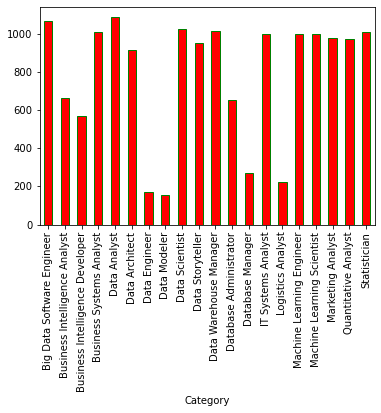

In [81]:
df_salary.groupby(['Category']).size().plot(kind = "bar", color='r', edgecolor='g')